<h3>Time Series Data</h3>

In [1]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# matplotlib and inline graphics
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Representation of dates, time, and
intervals</h4>

<h4>The datetime, day, and time objects</h4>

<p>The datetime object is part of the datetime library and not a part of pandas. This class
can be utilized to construct objects representing a fixed point in time at a specific date and
time or simply a day without a time component or a time without a date component.</p><p>
With respect to pandas, the datetime objects do not have the accuracy needed for much of
the mathematics involved in extensive calculations on time-series data. However, they are
commonly used to initialize pandas objects with pandas converting them into pandas
timestamp objects behind the scenes. Therefore, they are worth a brief mention here, as
they will be used frequently during initialization.</p>

A datetime object can be initialized using a minimum of three parameters representing
year, month, and day:

In [2]:
# datetime object for Dec 15 2014
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

Notice that the result has defaulted two values to 0, which represents the hour and minute.
The hour and minute components can also be specified with two more values to the
constructor. The following creates a datetime object that also specifies 5:30 p.m.:

In [3]:
# specific date and also with a time of 5:30 pm
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

The current date and time can be determined using the datetime.now() function, which
retrieves the local date and time:

In [4]:
# get the local "now" (date and time)
# can take a time zone, but that's not demonstrated here
datetime.now()

datetime.datetime(2020, 8, 7, 9, 38, 3, 130247)

A datetime.date object represents a specific day (no time). It can be created by passing a
datetime object to the constructor:

A time without a date component can be represented by creating a datetime.time object
by passing a datetime object to its constructor:

In [5]:
# get just a time from a datetime
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [6]:
# get the current local time
datetime.now().time()

datetime.time(9, 38, 3, 175256)

<h3>Timestamp objects</h3>

<p>Specific dates and times in pandas are represented using the pandas.tslib.Timestamp
class. Timestamp is based on the datetime64 dtype and has higher precision than the
Python datetime object. Timestamp objects are generally interchangeable with datetime
objects, so you can typically use them wherever you may use datetime objects.
</p><p>You can create a Timestamp object using pd.Timestamp (a shortcut for
pandas.tslib.Timestamp) and by passing a string representing a date, time, or date and
time:</p>

In [7]:
# a timestamp representing a specific date
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [8]:
# a timestamp with both date and time
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

Timestamp can be created using just a time, which will <b>default to also assigning the
current local date:</b>

In [9]:
# timestamp with just a time
# which adds in the current local date
pd.Timestamp('17:30')

Timestamp('2020-08-07 17:30:00')

In [10]:
# get the current date and time (now)
pd.Timestamp("now")

Timestamp('2020-08-07 09:38:03.285242')

Normally, as a pandas user, you will not create Timestamp objects directly. Many of the
pandas functions that use dates and times will allow you to pass in a datetime object or a
text representation of a date/time and the functions will perform the conversion internally

<h3>Timedelta</h3>

<p>A difference between two pandas Timestamp objects is represented by a timedelta object,
which is a representation of an exact difference in time. These are common as results of
determining the duration between two dates or to calculate the date at a specific interval of
time from another date and/or time.</p><p>
To demonstrate, the following uses a timedelta object to calculate a one-day increase in
the time from the specified date:</p>

In [11]:
# what is one day from 2014-11-30?
today = datetime(2020, 8, 5)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2020, 8, 6, 0, 0)

The following demonstrates how to calculate how many days there are between two dates:

In [12]:
# how many days between these two dates?
date1 = datetime(2020, 8, 5)
date2 = datetime(1983, 8, 18)
date1 - date2

datetime.timedelta(days=13502)

<h3>Introducing time-series data</h3>

<p>Due to its roots in finance, pandas excels in manipulating time-series data. Its abilities
have been continuously refined over all of its versions to progressively increase its
capabilities for time-series manipulation. These capabilities are the core of pandas and do
not require additional libraries, unlike R, which requires the inclusion of Zoo to provide
this functionality.</p>
<p>The core of the time-series functionality in pandas revolves around the use of specialized
indexes that represent measurements of data at one or more timestamps. These indexes in
pandas are referred to as DatetimeIndex objects. These are incredibly powerful objects,
and their being core to pandas provides the ability to automatically align data based on
dates and time, making working with sequences of data collected and time-stamped as
easy as with any other type of indexes.</p><p>
We will now examine how to create time-series data and DatetimeIndex objects both
using explicit timestamp objects and using specific durations of time (referred to in pandas
as frequencies).</p>

<h3>DatetimeIndex</h3>

<p>Sequences of timestamp objects are represented by pandas as DatetimeIndex, which is a
type of pandas index that is optimized for indexing by date and time.</p><p>
There are several ways to create DatetimeIndex objects in pandas. The following creates
a DateTimeindex by passing a list of datetime objects as Series:</p>

In [13]:
# create a very simple time-series with two index labels
# and random values
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.754896
2014-08-02   -1.523868
dtype: float64

<p>Series has taken the datetime objects and constructed a DatetimeIndex from the date
values, where each value of DatetimeIndex is a Timestamp object. This is one of the cases
where pandas directly constructs Timestamp objects on your behalf.</p><p>
The following verifies the type of the index and the types of the labels in the index:

In [14]:
# what is the type of the index?
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
# and we can see it is a collection of timestamps
type(ts.index[0])


pandas._libs.tslibs.timestamps.Timestamp

It is not required that you pass datetime objects in the list to create a time series. The
Series object is smart enough to recognize that a string represents datetime and does the
conversion for you. The following is equivalent to the previous example:

In [16]:
# create from just a list of dates as strings!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

pandas provides a utility function in pd.to_datetime(). This function takes a sequence of
similar- or mixed-type objects and pandas attempts to convert each into Timestamp and the
collection of these timestamps into DatetimeIndex. If an object in the sequence cannot be
converted, then NaT, representing not-a-time will be returned at the position in the index:

In [17]:
# convert a sequence of objects to a DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014', '2014-08-02', '2014.8.3', None])

for l in dti: print (l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


Be careful, as the pd.to_datetime() function will, by default, fall back to returning a
NumPy array of objects instead of DatetimeIndex if it cannot parse a value to Timestamp:

A range of timestamps at a specific frequency can be easily created using the
pd.date_range() function. The following creates a Series object from DatetimeIndex of
10 consecutive days:

In [18]:
# create a range of dates starting at a specific date
# and for a specific number of days, creating a Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

Like any pandas index, DatetimeIndex can be used for various index operations, such as
data alignment, selection, and slicing. The following demonstrates slicing using index
locations:

In [19]:
# slice by location
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

To demonstrate, we will use the following Series created with the index of the subset we
just created:

In [20]:
# a Series to demonstrate alignment
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

When we add s2 and date_series, alignment will be performed, returning NaN where
items do not align and the sum of the two values where they align:

In [21]:
# demonstrate alignment by date on a subset of items
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

Items in Series with DatetimeIndex can be retrieved using a string representing a date
instead having to specify a datetime object:

In [22]:
# lookup item by a string representing a date
date_series['2014-08-05']

1.2121120250208506

DatetimeIndex can also be indexed and sliced using a string that represents a date or
using datetime objects:

In [23]:
# slice between two dates specified by string representing dates
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

Another convenient feature of pandas is that DatetimeIndex can be sliced using partial
date specifications. As an example, the following code creates a Series object with dates
spanning two years and then selects only those items of the year 2013:

In [24]:
# a two year range of daily data in a Series
# only select those in 2013
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2014-12-27    0
2014-12-28    0
2014-12-29    0
2014-12-30    0
2014-12-31    0
Freq: D, Length: 730, dtype: int64

In [25]:
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

We can also select items only in a specific year and month. This is demonstrated by the
following, which selects the items in August 2014:

In [26]:
# 31 items for May 2014
s3['2014-05']

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

We can slice data contained within two specified months, as demonstrated by the
following, which returns items in August and September, 2014:

In [27]:
# items between two months
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

<h3>Creating time-series data with specific frequencies</h3>

<p>Time-series data in pandas can be created on intervals other than daily frequency.
Different frequencies can be generated with pd.date_range() by utilizing the freq
parameter. This parameter defaults to a value of 'D', which represents daily frequency.</p><p>
To demonstrate alternative frequencies, the following creates a DatetimeIndex with 1-
minute intervals between the two specified dates by specifying freq='T':</p>

In [28]:
# generate a Series at one minute intervals
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90), pd.date_range('2014-08-01', '2014-10-29 23:59', freq='T'))
bymin

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
                         ...   
2014-10-29 23:55:00   -0.563029
2014-10-29 23:56:00    1.180497
2014-10-29 23:57:00    1.850604
2014-10-29 23:58:00   -1.589660
2014-10-29 23:59:00    0.266429
Freq: T, Length: 129600, dtype: float64

This time series allows us to slice at a finer resolution, down to the minute and smaller
intervals if using finer frequencies. To demonstrate minute-level slicing, the following
slices the values at 9 consecutive minutes:

In [29]:
# slice down to the minute
bymin['2014-08-01 00:02':'2014-08-01 00:10']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
2014-08-01 00:08:00   -0.861849
2014-08-01 00:09:00   -2.104569
2014-08-01 00:10:00   -0.494929
Freq: T, dtype: float64

<p>The following table lists the possible frequency values:</p>

<table>
    <tr><th>Alias</th><th>Description</th>
<tr><td>B</td><td> Business day frequency</td>
<tr><td>C</td><td> Custom business day frequency</td>
<tr><td>D</td><td> Calendar day frequency (the default)</td>
<tr><td>W</td><td> Weekly frequency</td>
<tr><td>M</td><td> Month end frequency</td>
<tr><td>BM</td><td> Business month end frequency</td>
<tr><td>CBM</td><td> Custom business month end frequency</td>
<tr><td>MS</td><td> Month start frequency</td>
<tr><td>BMS</td><td> Business month start frequency</td>
<tr><td>CBMS</td><td> Custom business month start frequency</td>
<tr><td>Q</td><td> Quarter end frequency</td>
<tr><td>BQ</td><td> Business quarter frequency</td>
<tr><td>QS</td><td> Quarter start frequency</td>
<tr><td>BQS</td><td> Business quarter start frequency</td>
<tr><td>A</td><td> Year end frequency</td>
<tr><td>BA</td><td> Business year-end frequency</td>
<tr><td>AS</td><td> Year start frequency</td>
<tr><td>BAS</td><td> Business year start frequency</td>
<tr><td>H</td><td> Hourly frequency</td>
<tr><td>T</td><td> Minute-by-minute frequency</td>
<tr><td>S</td><td> Second-by-second frequency</td>
<tr><td>L</td><td> Milliseconds</td>
<tr><td>U</td><td> Microseconds</td>
    </table>

In [30]:
# generate a Series at one second intervals
np.random.seed(123456)
bymin = pd.Series(0, pd.date_range('2014-08-01', '2014-08-02', freq='S'))
bymin

2014-08-01 00:00:00    0
2014-08-01 00:00:01    0
2014-08-01 00:00:02    0
2014-08-01 00:00:03    0
2014-08-01 00:00:04    0
                      ..
2014-08-01 23:59:56    0
2014-08-01 23:59:57    0
2014-08-01 23:59:58    0
2014-08-01 23:59:59    0
2014-08-02 00:00:00    0
Freq: S, Length: 86401, dtype: int64

As an example, if you want to generate a time series that uses only business days, then use
the 'B' frequency:

In [31]:
# generate a series based upon business days
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
for d in days : print (d)

2014-08-29 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00


<p>In this time series, we can see that two days were skipped as they were on the weekend,
which would not have occurred using a calendar-day frequency.</p><p>
A range can be created starting at a particular date and time with a specific frequency and
for a specific number of periods using the periods parameter. To demonstrate, the
following creates a 10-item DatetimeIndex starting at 2014-08-01 12:10:01 and at 1-
second intervals:</p>

In [32]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01', freq='S', periods=10)

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02',
               '2014-08-01 12:10:03', '2014-08-01 12:10:04',
               '2014-08-01 12:10:05', '2014-08-01 12:10:06',
               '2014-08-01 12:10:07', '2014-08-01 12:10:08',
               '2014-08-01 12:10:09', '2014-08-01 12:10:10'],
              dtype='datetime64[ns]', freq='S')

<h3>Calculating new dates using offsets</h3>

<p>Frequencies in pandas are represented using date offsets. We have touched on this concept
at the beginning of the chapter when discussing Timedelta objects. pandas extends the
capabilities of these using the concept of DateOffset objects, which represent knowledge
of how to integrate time offsets and frequencies relative to DatetimeIndex objects.</p><p>
We will examine how pandas uses date offsetting in two different ways. The first
calculates offsets of a specific duration from a given date, and the other calculates offsets
based on what are referred to as anchored offsets.</p>

<h3>Date offsets</h3>

<p>DatetimeIndex objects are created at various frequencies by passing in frequency strings,
such as 'M', 'W', and 'BM' to the freq parameter of pd.date_range(). Under the hood,
these frequency strings are translated into an instance of the pandas DateOffset object,
which is associated with the frequency of the index.</p><p>
DateOffset represents a regular frequency increment. Specific date offset logic, such as
“month”, “business day”, or “hour”, is represented in pandas with various subclasses of
DateOffset. A DateOffset provides pandas with the intelligence to be able to determine
how to calculate a specific interval of time from a reference date and time.</p><p>
The use of DatetimeIndex and DateOffset objects provides the user of pandas great
flexibility in calculating a new date/time from another using an offset other than one that
represents a fixed period of time. A practical example would be to calculate the next day
of business. This is not simply determined by adding one day to datetime. If a date
represents a Friday, the next business day in the US financial market is not Saturday but
Monday. In some cases, one business day from a Friday may actually be Tuesday if
Monday is a holiday. pandas gives us all the tools required to handle these scenarios.</p><p>
We can start to examine the use of date offsets by generating a date range using 'B' as the
frequency, which will return a sequence of dates between the specified dates—but only
dates that are considered business days during that interval:</p>

In [33]:
# get all business days between and inclusive of these two dates
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

<p>This time series has omitted 2014-08-30 and 2014-08-30, as they are Saturday and
Sunday and not considered a business day.</p><p>
DatetimeIndex has a .freq property that represents the frequency of the timestamps in
the index</p>

In [34]:
# check the frequency is BusinessDay
dti.freq

<BusinessDay>

<p>Notice that pandas has created an instance of the BusinessDay class to represent the
DateOffset unit of this index. As mentioned earlier, pandas represents different date
offsets with a subclass of the DateOffset class. The following are the various built-in date
offset classes that are provided by pandas:</p>

<table>
    <tr><th>Class</th><th>Description</th>
<tr><td>DateOffset</td><td> Generic offset defaults to one calendar day</td>
<tr><td>BDay</td><td> Business day</td>
<tr><td>CDay</td><td> Custom business day</td>
<tr><td>Week</td><td> One week, optionally anchored on a day of the week</td>
<tr><td>WeekOfMonth</td><td> The x-th day of the y-th week of each month</td>
<tr><td>LastWeekOfMonth</td><td> The x-th day of the last week of each month</td>
<tr><td>MonthEnd</td><td> Calendar month end</td>
<tr><td>MonthBegin</td><td> Calendar month start</td>
<tr><td>BMonthEnd</td><td> Business month end</td>
<tr><td>BMonthBegin</td><td> Business month start</td>
<tr><td>CBMonthEnd</td><td> Custom business month end</td>
<tr><td>CBMonthBegin</td><td> Custom business month start</td>
<tr><td>QuarterEnd</td><td> Quarter end</td>
<tr><td>QuarterBegin</td><td> Quarter start</td>
<tr><td>BQuarterEnd</td><td> Business quarter end</td>
<tr><td>BQuarterBegin</td><td> Business quarter start</td>
<tr><td>FYS253Quarter</td><td> Retail (52-53 week) quarter</td>
<tr><td>YearEnd</td><td> Calendar year end</td>
<tr><td>YearBegin</td><td> Calendar year start</td>
<tr><td>BYearEnd</td><td> Business quarter end</td>
<tr><td>BYearBegin</td><td> Business quarter start</td>
<tr><td>FYS253</td><td> Retail (52-53 week) year</td>
<tr><td>Hour</td><td> One hour</td>
<tr><td>Minute</td><td> One minute</td>
<tr><td>Second</td><td> One second</td>
<tr><td>Milli</td><td> One millisecond</td>
<tr><td>Micro</td><td> One microsecond</td>

<p>pandas takes this strategy of using DateOffset and its specializations to codify logic to
calculate the next datetime from another datetime. This makes using these objects very
flexible as well as powerful. DateOffset objects can be used in various scenarios,
including the following:</p>
<ul>
<li>They can be added/subtracted to/from a datetime object to obtain a shifted date</li>
<li>They can be multiplied by an integer (positive or negative) so that the increment will
be applied multiple times</li>
    <li>They have rollforward and rollback methods to move a date forward or backward
to the next or previous “offset date”</li></ul>
<p>
DateOffset objects can be created by passing them a datetime object that represents a
fixed duration of time or using a number of keyword arguments. Keyword arguments fall
into two general categories. The first category is keywords that represent absolute dates:
year, month, day, hour, minute, second, and microsecond. The second category represents
relative durations and can be negative values: years, months, weeks, day, hours, minutes,
seconds, and microseconds.</p>
<p>
The following creates a 1-day offset and adds it to datetime:</p>

In [35]:
# calculate a one day offset from 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1)
d + do

Timestamp('2014-08-30 00:00:00')

The following calculates the next business day from a given date:

In [36]:
# import the data offset types
from pandas.tseries.offsets import *
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [37]:
# determine 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

The following demonstrates using a BMonthEnd object to calculate the last business day of
a month from a given date (in this case, 2014-09-02):

In [38]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

The following uses the BMonthEnd objects’ .rollforward() method to calculate the next
month end:

In [39]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

Several of the offset classes can be parameterized to provide finer control of the offset
behavior. As an example, the following calculates the date of the Tuesday (weekday = 1)
in the week prior to 2014-08-31:

In [40]:
# calculate the date of the Tuesday previous to a specified date
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

In [41]:
d

datetime.datetime(2014, 8, 29, 0, 0)

<h3>Anchored Offsets</h3>

pandas also supports the concept of anchored offsets, which are frequencies that can be
specified using a specific suffix. One version of anchored offsets allows you to specify
weekly intervals that fall on a specific day of the week. These aliases are of this form:

<table>
    <tr><th>Alias</th><th>Description</th>
    <tr><td>W-SUN</td><td>Weekly on Sunday (same as 'W')</td>
<tr><td>W-MON</td><td>Weekly on Monday</td>
<tr><td>W-TUE</td><td>Weekly on Tuesday</td>
<tr><td>W-WED</td><td>Weekly on Wednesday</td>
<tr><td>W-THU</td><td>Weekly on Thursday</td>
<tr><td>W-FRI</td><td>Weekly on Friday</td>
<tr><td>W-SAT</td><td>Weekly on Saturday</td>

As an example, the following generates an index that consists of the dates of all
Wednesdays between the two specified dates:

In [42]:
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01', '2014-08-31', freq="W-WED")
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-08-06T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-20T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')

<p>Anchored offsets can also be created using the annual and quarterly frequencies. These
frequency anchors are of the general form [B][A|Q][S]-[MON], where B (business days)
and S (start of period instead end) are optional, A is for annual or Q for quarterly, and MON is
the three-digit abbreviation for the month (JAN, FEB, …).</p><p>
To demonstrate, the following generates the business dates for quarter end in the year</p>


In [43]:
# what are all of the business quarterly end dates in 2014?
qends = pd.date_range('2014-01-01', '2014-12-31', freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

<h3>Representing durations of time using Period
objects</h3>

<p>Many useful mathematical operations on time-series data require that events within a
specific time interval be analyzed. A simple example would be to determine how many
financial transactions occurred in a specific period.</p>
<p>This can be performed using Timestamp and DateOffset, where the bounds are calculated
and then items filtered based on these bounds. However, this becomes cumbersome when
you need to deal with events that must be grouped into multiple periods of time as you
start to need to manage sets of the Timestamp and DateOffset objects.</p>
<p>To facilitate these types of data organization and calculations, pandas makes intervals of
time a formal construct using the Period class. pandas also formalizes series of Period
objects using PeriodIndex, which provides capabilities of aligning data items based on
the indexes’ associated period objects.</p>
<p>We will look at the Period object and PeriodIndex in detail in the following subsections.</p>

<h3>The Period object</h3>

<p>pandas formalizes the concept of an interval of time using a Period object. Period allows
you to specify durations based on frequencies such as daily, weekly, monthly, annually,
quarterly, and so on, and it will provide a specific start and end Timestamp representing
the specific bounded interval of time.</p><p>
Period is created using a timestamp and a frequency (seen in the table earlier), where the
timestamp represents the anchor used as a point of reference and the frequency is the
duration of time.</p><p>
To demonstrate, the following creates a period representing one month anchored in August
2014:</p>

In [44]:
# create a period representing a month of time
# starting in August 2014
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

Period has start_time and end_time properties that inform us about the derived start and
end times of Period:

In [45]:
# examine the start and end times of this period
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

<p>As we specified a period that is August 2014, pandas determines the anchor (start_time)
and then calculates end_time based on the specified frequency. In this case, it calculates
one month from start_time and returns the last unit of the prior time.</p><p>
Mathematical operations are overloaded on Period to calculate another Period based on
the given value. The following creates a new Period object based on aug2014, which is
shifted by 1 unit of its represented frequency (which is one month):</p>

In [46]:
# calculate the period that is one frequency
# unit of the aug2014 period further along in time
# This happens to be September 2014
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

<p>The concept of the shift is very important and powerful. The addition of 1 to this Period
object informs it to shift in time one positive unit of whatever frequency is represented by
the object. In this case, it shifts the period one month forward to September 2014.</p><p>
If we examine the start and end times represented in the sep2014 object, we see that
pandas has gone through the effort of determining the correct dates representing the
entirety of September 2014:</p>

In [47]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

Note that Period had the intelligence to know that September is 30 days and not 31. This
is part of the incredible intelligence behind the Period object that saves us a lot of coding.
It is not simply adding 30 days (in this example) but one unit frequency of the period. This
helps solve many difficult date management problems.

<h3>Period Index</h3>

<p>A series of Period objects can be combined into a special form of pandas index known as
PeriodIndex. A PeriodIndex index is useful for being able to associate data to specific
intervals of time and being able to slice and perform analysis on the events in each interval
represented in PeriodIndex.</p><p>
The following code creates a PeriodIndex consisting of 1-month intervals for the year
2013:</p>

In [48]:
# create a period index representing
# all monthly boundaries in 2013
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

PeriodIndex differs from DatetimeIndex in that the index labels are the Period objects.
The following prints the start and end times for all the Period objects in the index:

In [49]:
# loop through all period objects in the index
# printing start and end time for each
for p in mp2013:
    print ("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


<p>pandas has conveniently determined the start and end of each month, taking into account
the actual number of days in each specific month.</p><p>
Using PeriodIndex, we can construct a Series object using it as the index and associate a
value to each Period in the index:</p>

In [50]:
# create a Series with a PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2013-08   -1.044236
2013-09   -0.861849
2013-10   -2.104569
2013-11   -0.494929
2013-12    1.071804
Freq: M, Length: 12, dtype: float64

In [51]:
ps.index

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

<p>We now have a time series where the value at a specific index label represents a
measurement that spans a period of time, such as the average value of a security in a given
month instead of at a specific time. This becomes very useful when we perform the
resampling of the time series to another frequency.</p><p>
Like DatetimeIndex, PeriodIndex can be used to index values using Period, a string
representing a period or partial period specification. To demonstrate, we will create
another series similar to the previous one but spanning two years, 2013 and 2014:</p>

In [52]:
# create a Series with a PeriodIndex and which
# represents all calendar month periods in 2013 and 2014
np.random.seed(123456)
ps = pd.Series(np.random.randn(24), pd.period_range('1/1/2013', '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

Individual values can be selected using the specific index label using either a Period
object or a string representing a period. The following demonstrates how to use a string
representation:

In [53]:
# get value for period represented by 2014-06
ps['2014-06']

0.567020349793672

Partial specifications can also be used, such as the following, which retrieves all values
just for periods in 2014:

In [54]:
# get values for all periods in 2014
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

Like any index in pandas, PeriodIndex can also be sliced. The following retrieves all
values for periods between (and inclusive of) March and June 2014:

In [55]:
# all values between (and including) March and June 2014
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

<h3>Handling holidays using calendars</h3>

<p>Earlier, when we calculated the next business day from August 29, 2014, we were told by
pandas that this date is September 1, 2014. This is actually not correct in the United
States: September 1, 2014 is a US federal holiday and banks and exchanges are closed on
this day. The reason for this is that pandas uses a specific default calendar when
calculating the next business day, and this default pandas calendar does not include
September 1, 2014 as a holiday.</p><p>
The solution to this is to either create a custom calendar (which we will not get into the
details of), or use the one custom calendar provided by pandas for just this situation,
USFederalHolidayCalendar. This custom calendar can then be passed to a
CustomBusinessDay object that will be used instead of a BusinessDay object. This
calculation using this CustomBusinessDay object will then use the new calendar and take
into account the US federal holidays.</p><p>
The following demonstrates the creation of a USFederalCalendar object and how to use it
to report the days that it considers holidays:</p>

In [56]:
# demonstrate using the US federal holiday calendar
# first need to import it
from pandas.tseries.holiday import *
# create it and show what it considers holidays
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print (d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


We can now use this calendar object to calculate the next business day from August 29,
2014:

In [57]:
# create CustomBusinessDay object based on the federal calendar
cbd = CustomBusinessDay(holidays=cal.holidays())

# now calc next business day from 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

Note that instead of using a BusinessDay object, we used an instance of
CustomBusinessDay and specified the holidays using USFederalHolidayCalendar. The
resulting calculation now takes into account Labor Day not being a business day and
returns the correct date of 2014-09-02.

<h3>Normalizing timestamps using time zones</h3>

<p>Time zone management can be one of the most complicated issues to deal with when
working with time-series data. Data is often collected in different systems across the globe
using local time, and at some point, it will require coordination with data collected in other
time zones.</p><p>
Fortunately, pandas provides rich support for working with timestamps in different time
zones. Under the covers, pandas utilizes the pytz and dateutil libraries to manage the
time zone operations. The dateutil support is new as of pandas 0.14.1 and currently only
supported for fixed offset and tzfile zones. The default library used by pandas is pytz,
with support for dateutil provided for compatibility with other applications.</p><p>
pandas objects that are time zone-aware support a .tz property. By default, pandas objects
that are time zone-aware do not utilize a timezone object for purposes of efficiency. The
following gets the current time and demonstrates that there is no time zone information by
default:</p>

In [58]:
# get the current local time and demonstrate there is no
# timezone info by default
now = pd.Timestamp('now')

now, now.tz is None

(Timestamp('2020-08-07 09:38:04.760097'), True)

<p>This demonstrates that pandas treats Timestamp("now") as UTC by default but without
time zone data. This is a good default, but be aware of this. In general, I find that if you
are ever collecting data based on the time that will be stored for later access, or collected
from multiple data sources, it is best to always localize to UTC.</p><p>
Likewise, DatetimeIndex and its Timestamp objects will not have associated time zone
information by default:</p>

In [59]:
# default DatetimeIndex and its Timestamps do not have
# time zone information
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

A list of common time zone names can be retrieved as shown in the following example. If
you do a lot with time zone data, these will become very familiar:

In [60]:
# import common timezones from pytz
from pytz import common_timezones

# report the first 5
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

The local UTC time can be found using the following, which utilizes the .tz_localize()
method of Timestamp passing the 'UTC' method:

In [61]:
# get now, and now localized to UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2020-08-07 09:38:05.596127'),
 Timestamp('2020-08-07 09:38:05.596127+0000', tz='UTC'))

Any Timestamp can be localized to a specific time zone by passing the time zone name to
.tz_localize():


In [62]:
# localize a timestamp to US/Mountain time zone
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

DatetimeIndex can be created with a specific time zone using the tz parameter of the
pd.date_range() method:

In [63]:
# create a DatetimeIndex using a time zone
rng = pd.date_range('3/6/2012 00:00:00', periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [64]:
# create a DatetimeIndex using a time zone
rng = pd.date_range('3/6/2012 00:00:00', periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

It is also possible to construct other time zones explicitly. This model can give you more
control over which time zone is used in .tz_localize(). The following creates two
different timezone objects and localizes a Timestamp to each:


In [65]:
# show use of time zone objects
# need to reference pytz
import pytz
# create an object for two different time zones
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# apply each to 'now'
now, mountain_tz.localize(now), eastern_tz.localize(now)


(Timestamp('2020-08-07 09:38:05.596127'),
 Timestamp('2020-08-07 09:38:05.596127-0600', tz='US/Mountain'),
 Timestamp('2020-08-07 09:38:05.596127-0400', tz='US/Eastern'))

Operations on multiple time-series objects will be aligned by Timestamp in their index by
taking into account the time zone information. To demonstrate, we will use the following,
which creates two Series objects using the two DatetimeIndex objects, each with the
same start, periods, and frequency but using different time zones:

In [66]:
# create two Series, same start, same periods, same frequencies,
# each with a different time zone
s_mountain = Series(np.arange(0, 5), index=pd.date_range('2014-08-01', periods=5, freq="H", tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5), index=pd.date_range('2014-08-01', periods=5, freq="H", tz='US/Eastern'))

s_mountain, s_eastern

(2014-08-01 00:00:00-06:00    0
 2014-08-01 01:00:00-06:00    1
 2014-08-01 02:00:00-06:00    2
 2014-08-01 03:00:00-06:00    3
 2014-08-01 04:00:00-06:00    4
 Freq: H, dtype: int32,
 2014-08-01 00:00:00-04:00    0
 2014-08-01 01:00:00-04:00    1
 2014-08-01 02:00:00-04:00    2
 2014-08-01 03:00:00-04:00    3
 2014-08-01 04:00:00-04:00    4
 Freq: H, dtype: int32)

The following demonstrates the alignment of these two Series objects by time zone by
adding the two together:

In [67]:
# add the two Series
# This only results in three items being aligned
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

Once a time zone is assigned to an object, that object can be converted to another time
zone using the tz.convert() method:

In [68]:
# convert s1 from US/Eastern to US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int32

Now if we add s_pacific to s_mountain, the alignment will force the same result:

In [69]:
# this will be the same result as s_eastern + s_mountain
# as the time zones still get aligned to be the same
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

<h3>Manipulating time-series data</h3>

<p>We will now examine several common operations that are performed on time-series data.
These operations entail realigning data, changing the frequency of the samples and their
values, and calculating aggregate results on continuously moving subsets of the data to
determine the behavior of the values in the data as time changes. We will examine each of
the following:</p>
<ul>
    <li>Shifting and lagging values to calculate percentage changes</li>
<li>Changing the frequency of the data in the time series</li>
<li>Up and down sampling of the intervals and values in the time series</li>
<li>Performing rolling-window calculations</li>

<h4>Shifting and lagging</h4>

<p>A common operation on time-series data is to shift the values backward and forward in
time. The pandas method for this is .shift(), which will shift values in Series or
DataFrame a specified number of units of the index’s frequency.</p><p>
To demonstrate shifting, we will use the following Series. This Series has five values, is
indexed by date starting at 2014-08-01, and uses a daily frequency:</p>

In [70]:
# create a Series to work with
np.random.seed(123456)
ts = Series([1, 2, 2.5, 1.5, 0.5], pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

The following shifts the values forward by 1 day:

In [71]:
# shift forward one day
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

<p>pandas has moved the values forward one unit of the index’s frequency, which is one day.
The index remains unchanged. There was no replacement data for 2014-08-01, so it is
filled with NaN.</p><p>
A lag is a shift in a negative direction. The following lags the Series by 2 days:</p>

In [72]:
# lag two days
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

<p>Index labels 2014-08-04 and 2014-08-03 now have NaN values as there were no items to
replace.</p><p>
A common calculation that is performed using a shift is to calculate the percentage daily
change in values. This can be performed by dividing a Series object by its values shifted
by 1:</p>

In [75]:
# calculate daily percentage change
ts / ts.shift(1)*100

2014-08-01           NaN
2014-08-02    200.000000
2014-08-03    125.000000
2014-08-04     60.000000
2014-08-05     33.333333
Freq: D, dtype: float64

In [74]:
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [76]:
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

Shifts can be performed on different frequencies than that in the index. When this is
performed, the index will be modified and the values remain the same. As an example, the
following shifts the Series forward by one business day:

In [80]:
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [79]:
# shift forward one business day
ts.shift(1, freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

As another example, the following shifts forward by 5 hours:

In [82]:
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [81]:
# shift forward five hours
ts.tshift(5, freq="H")

2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

A time series can also be shifted using DateOffset. The following code shifts the time
series forward by 0.5 minutes:

In [83]:
# shift using a DateOffset
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
Freq: D, dtype: float64

There is an alternative form of shifting provided by the .tshift() method. This method
shifts the index labels by the specified units and a frequency specified by the freq
parameter (which is required). The following code demonstrates this approach by
adjusting the index by -1 hour:

In [84]:
# shift just the index values
ts.tshift(-1, freq='H')

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

<h3>Frequency conversion</h3>

<p>Frequency data can be converted in pandas using the .asfreq() method of a time-series
object, such as Series or DataFrame. When converting frequency, a new Series object
with a new DatatimeIndex object will be created. The DatetimeIndex of the new Series
object starts at the first Timestamp of the original and progresses at the given frequency
until the last Timestamp of the original. Values will then be aligned into the new Series.</p><p>
To demonstrate, we will use the following time series of consecutive incremental integers
mapped into each hour of each day for August 2014:</p>

In [86]:
# create a Series of incremental values
# index by hour through all of August 2014
periods = 31 * 24
hourly = Series(np.arange(0, periods), pd.date_range('08-01-2014', freq="2H", periods = periods))
hourly

2014-08-01 00:00:00      0
2014-08-01 02:00:00      1
2014-08-01 04:00:00      2
2014-08-01 06:00:00      3
2014-08-01 08:00:00      4
                      ... 
2014-10-01 14:00:00    739
2014-10-01 16:00:00    740
2014-10-01 18:00:00    741
2014-10-01 20:00:00    742
2014-10-01 22:00:00    743
Freq: 2H, Length: 744, dtype: int32

As an example, the following converts this time series to a daily frequency using
.asfreq('D'):

In [87]:
# convert to daily frequency
# many items will be dropped due to alignment
daily = hourly.asfreq('D')
daily

2014-08-01      0
2014-08-02     12
2014-08-03     24
2014-08-04     36
2014-08-05     48
             ... 
2014-09-27    684
2014-09-28    696
2014-09-29    708
2014-09-30    720
2014-10-01    732
Freq: D, Length: 62, dtype: int32

<p>As data was aligned to the new daily time series from the hourly time series, only values
matching the exact days were copied.</p><p>
If we convert this result back to an hourly frequency, we will see that many of the values
are NaN:</p>

In [88]:
# convert back to hourly. Results in many NaNs
# as the new index has many labels that do not
# align with the source
daily.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-09-30 20:00:00      NaN
2014-09-30 21:00:00      NaN
2014-09-30 22:00:00      NaN
2014-09-30 23:00:00      NaN
2014-10-01 00:00:00    732.0
Freq: H, Length: 1465, dtype: float64

The new index has Timestamp objects at hourly intervals, so only the timestamps at exact
days align with the daily time series, resulting in 670 NaN values.
This default behavior can be changed using the method parameter of the .asfreq()
method. This value can be used for forward fill, reverse fill, or to pad the NaN values.
The ffill method will forward fill the last known value (pad also does the same):

In [89]:
# forward fill values
daily.asfreq('H', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int32

The bfill method will back fill values from the next known value:

In [90]:
daily.asfreq('H', method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int32

<h3>Up and down resampling</h3>

<p>Frequency conversion provides a basic way to convert the index in a time series to another
frequency. Data in the new time series is aligned with the old data and can result in many
NaN values. This can be partially solved using a fill method, but that is limited in its
capabilities to fill with appropriate information.</p><p>
Resampling differs in that it does not perform a pure alignment. The values placed in the
new series can use the same forward and reverse fill options, but they can also be specified
using other pandas-provided algorithms or with your own functions.</p><p>
To demonstrate resampling, we will use the following time series, which represents a
random walk of values over a 5-day period:</p>

In [101]:
# calculate a random walk five days long at one second intervals
# these many items will be needed
count = 24 * 60 * 60 * 5

# create a series of values
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)

In [102]:
###### calculate the walk
walk = ws.cumsum()
walk

0           0.469112
1           0.186249
2          -1.322810
3          -2.458442
4          -1.246330
             ...    
431995    456.529763
431996    456.052131
431997    455.202981
431998    454.947362
431999    456.191430
Length: 432000, dtype: float64

In [103]:
# patch the index
walk.index = pd.date_range('2014-08-01', periods=count, freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

Resampling in pandas is accomplished using the .resample() method, by passing it a new
frequency. To demonstrate this the following resamples our by-the-second data to by-theminute.
This is a downsampling as the result has a lower frequency and results in less
values:

In [108]:
# resample to minute intervals
walk.resample("1Min").mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

Notice that the first value is -8.718220 whereas the original data had a value of 0.469112.
A frequency conversion would have left this value at -8.718220. This is because a
resampling does not copy data through alignment. A resampling will actually split the data
into buckets of data based on new periods and then apply a particular operation to the data
in each bucket. The default scenario is to calculate the mean of each bucket. This can be
verified with the following, which slices the first minute of data from the walk and
calculates its mean:

In [109]:
# calculate the mean of the first minute of the walk
walk['2014-08-01 00:00'].mean()

-8.718220052832644

<p>In downsampling, as the existing data is put into buckets based on the new intervals, there
can often be a question of what values are on each end of the bucket. As an example,
should the first interval in the previous resampling be from 2014-08-01 00:00:00 through
2014-08-01 23:59:59, or should it end at 2014-08-04 00:00:00 but start at 2014-08-03
23:59:59?</p><p>
The default is the former, and it is referred to as a left close. To other scenario that
excludes the left value and includes the right is a right close and can be performed by
using the close='right' parameter. The following demonstrates this; notice the slight
difference in the intervals and values:</p>

In [111]:
# use a right close
walk.resample("1Min", closed='right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

<p>The decision about whether to use a right or leftclose is really up to you and your data
modeling, but pandas gives you the option.</p><p>
The specific method that is applied to each group of samples can be specified using the
how parameter. As an example, the following takes the first value of each bucket:</p>

In [116]:
# take the first value of each bucket
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

<p>The how parameter can be supplied the name of any NumPy array function that takes an
array and produces aggregated values as well as any function you create on your own.</p><p>
To demonstrate upsampling, we will resample the walk to minutes and then back to
seconds:</p>

In [129]:
# resample to 1 minute intervals, then back to 1 sec
bymin = walk.resample("1Min").mean()
bymin.resample('S').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

The upsampling created the index values for the second-by-second data but inserted NaN
values by default. This default behavior can be modified using the fill_method
parameter. We saw this when changing frequency with the options of forward and
backward filling. These are also available with resampling. The following demonstrates
how to use the forward fill:

In [135]:
# resample to 1 second intervals using forward fill
bymin.resample("S").bfill()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

It is also possible to interpolate the missing values using the .interpolate() method on
the result. This will calculate a linear interpolation between the values existing in the
result for all of the NaN values created during the resampling:

In [136]:
# demonstrate interpolating the NaN values
interpolated = bymin.resample("S").interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

pandas provides a very convenient resampling method referred to as open, high, low, and
close, which is specified by the 'ohlc' function. The following example takes our
second-by-second data and calculates hour-by-hour ohlc values:

In [138]:
# show ohlc resampling
ohlc = walk.resample("H").ohlc()
ohlc

                           open        high         low       close
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   -2.922520
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154  -55.101543
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456    1.913276
2014-08-01 03:00:00    0.260576   17.124638  -65.820652  -38.530620
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294  -61.014553
...                         ...         ...         ...         ...
2014-08-05 19:00:00  437.652077  550.408942  430.549178  494.471788
2014-08-05 20:00:00  496.539759  510.371745  456.365565  476.505765
2014-08-05 21:00:00  476.025498  506.952877  425.472410  498.547578
2014-08-05 22:00:00  497.941355  506.599652  411.119919  443.925832
2014-08-05 23:00:00  443.017962  489.083657  426.062444  456.191430

[120 rows x 4 columns]

<h3>Time-series moving-window operations</h3>

<p>pandas provides a number of functions to compute moving (also known as rolling)
statistics. In a rolling window, pandas computes the statistic on a window of data
represented by a particular period of time. The window is then rolled along a certain
interval, and the statistic is continually calculated on each window as long as the window
fits within the dates of the time series.</p><p>
pandas provides direct support for rolling windows with the following functions:</p>

<table>
    <tr><th>Function</th><th>Description</th></tr>
    <tr><td>rolling_mean</td><td>The mean of values in the window</td></tr>
<tr><td>rolling_std</td><td>The standard deviation of values in the window</td></tr>
<tr><td>rolling_var</td><td>The variance of values</td></tr>
<tr><td>rolling_min</td><td>The minimum of values in the window</td></tr>
<tr><td>rolling_max</td><td>The maximum of values in the window</td></tr>
<tr><td>rolling_cov</td><td>The covariance of values</td></tr>
<tr><td>rolling_quantile</td><td>Moving window score at percentile/sample quantile</td></tr>
<tr><td>rolling_corr</td><td>Thecorrelation of values in the window</td></tr>
<tr><td>rolling_median</td><td>The median of values in the window</td></tr>
<tr><td>rolling_sum</td><td>The sum of values in the window</td></tr>
<tr><td>rolling_apply</td><td>The application of a user function to values in the window</td></tr>
<tr><td>rolling_count</td><td>The number of non-NaN values in a window</td></tr>
<tr><td>rolling_skew</td><td>The skewedness of the values in the window</td></tr>
<tr><td>rolling_kurt</td><td>The kurtosis of values in the window</td></tr></table>

<p>As a practical example, a rolling mean is commonly used to smooth out short-term
fluctuations and highlight longer-term trends in data and is used quite commonly in
financial time-series analysis.</p><p>
To demonstrate, we will calculate a rolling mean with a window of 5 on the first minute of
the random walk created earlier in the chapter. The following calculates this and then plots
the result against the raw data to demonstrate the smoothing created by the rolling mean:</p>

In [141]:
first_minute = walk['2014-08-01 00:00']
first_minute

2014-08-01 00:00:00     0.469112
2014-08-01 00:00:01     0.186249
2014-08-01 00:00:02    -1.322810
2014-08-01 00:00:03    -2.458442
2014-08-01 00:00:04    -1.246330
                         ...    
2014-08-01 00:00:55   -11.339218
2014-08-01 00:00:56   -10.928383
2014-08-01 00:00:57   -10.114533
2014-08-01 00:00:58    -9.982530
2014-08-01 00:00:59   -10.809847
Freq: S, Length: 60, dtype: float64

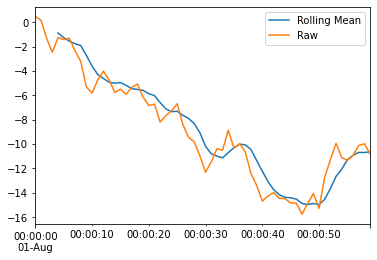

In [164]:
# calculate a rolling mean window of 5 periods
first_minute.rolling(5).mean().plot()
# plot it against the raw data
first_minute.plot()
# add a legend
plt.legend(labels=['Rolling Mean', 'Raw']);

<p>It can be seen how rolling_mean provides a smoother representation of the underlying
data. A larger window will create less variance, and smaller windows will create more
(until the window size is 1, which will be identical to the original series).</p><p>
The following demonstrates the rolling mean with windows of 2, 5, and 10 plotted against
the original series:</p>

In [167]:
# demonstrate the difference between 2, 5 and
# 10 interval rolling windows
h1w = walk['2014-08-01 00:00']
h1w

2014-08-01 00:00:00     0.469112
2014-08-01 00:00:01     0.186249
2014-08-01 00:00:02    -1.322810
2014-08-01 00:00:03    -2.458442
2014-08-01 00:00:04    -1.246330
                         ...    
2014-08-01 00:00:55   -11.339218
2014-08-01 00:00:56   -10.928383
2014-08-01 00:00:57   -10.114533
2014-08-01 00:00:58    -9.982530
2014-08-01 00:00:59   -10.809847
Freq: S, Length: 60, dtype: float64

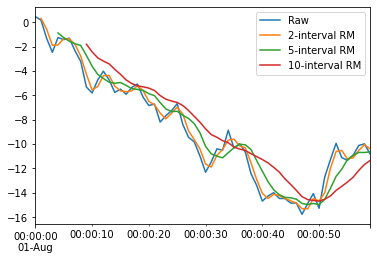

In [173]:
h1w.plot()
h1w.rolling(2).mean().plot()
h1w.rolling(5).mean().plot()
h1w.rolling(10).mean().plot()
plt.legend(labels=['Raw', '2-interval RM', '5-interval RM', '10-interval RM']);

<p>Note that the larger the window, the more data is missing at the beginning of the curve. A
window of size n requires n data points before the measure can be calculated and hence
the gap in the beginning of the plot.</p><p>
Any function can be applied via a rolling window using the rolling function.
The supplied function will be passed an array of values in the window and should return a
single value, which pandas will aggregate with these results into a time series.</p><p>
To demonstrate, the following code calculates the mean average deviation, which gives
you a feel of how far all values in the sample are from the overall mean on an average:</p>

<AxesSubplot:>

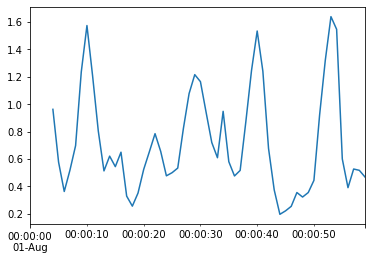

In [185]:
# calculate mean average deviation with window of 5 intervals
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
h1w.rolling(5).apply(mean_abs_dev).plot()

<p>An expanding window mean can be calculated using a slight variant of the use of the
pd.rolling_mean function that repeatedly calculates the mean by always starting with the
first value in the time series and for each iteration increases the window size by one. An
expanding window mean will be more stable (less responsive) than a rolling window,
because as the size of the window increases, the less the impact of the next value will be:</p>

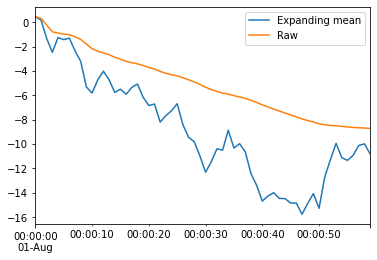

In [187]:
# calculate an expanding rolling mean
expanding_mean = lambda x: pd.rolling_mean(x, len(x), min_periods=1)
h1w.plot()
h1w.expanding().mean().plot()
plt.legend(labels=['Expanding mean', 'Raw']);